## Parse the Sample table

In [1]:
smp = open("../../tempest2k/src/incbin/sound_samples_table.bin",'rb')
smp.seek(0)
for i in range(0,31):
    print("dc.b",
          f"'{smp.read(20).decode('utf-8')}',", # Name
          f"${smp.read(2).hex()},", # Index
          f"${smp.read(2).hex()},", # Index
          f"${smp.read(4).hex()},", # Index
          f"${smp.read(3).hex()},", # Index
          f"${smp.read(1).hex()},", # Index
          f"${smp.read(4).hex()},", # Index
          f"${smp.read(3).hex()}", # Index
          f"${smp.read(1).hex()}", # Index
         )



dc.b 'Engine Noise 1      ', $0001, $01ac, $009acd00, $0011a0, $00, $009acd02, $00119e $00
dc.b 'Player Shot Normal 2', $0002, $01ac, $009adea4, $0008e8, $00, $009adea4, $000000 $00
dc.b 'Engine Noise        ', $0003, $01ac, $009ae290, $003378, $00, $009aee9e, $002594 $00
dc.b 'Player Death        ', $0004, $00d6, $00000000, $00549a, $00, $00000000, $000000 $00
dc.b 'Player Death 2      ', $0005, $01ac, $00000000, $002458, $00, $00000000, $000000 $00
dc.b 'Player Shot Normal  ', $0006, $01ac, $009b160c, $0007a4, $00, $009b160c, $000000 $00
dc.b 'Player Jump         ', $0007, $01ac, $009b1db4, $0018de, $00, $009b1db4, $000000 $00
dc.b 'Crackle             ', $0008, $00d6, $009b3696, $004594, $00, $009b3696, $000000 $00
dc.b 'Cleared Level       ', $0009, $01ac, $009b7c2e, $0037a2, $00, $009b7c2e, $000000 $00
dc.b 'Warp                ', $000a, $0238, $009bb3d4, $006ec8, $00, $009bb3d4, $000000 $00
dc.b 'Large Explosion     ', $000b, $01ac, $009c22a0, $0050c2, $00, $009c22a0, $000000 $00

In [69]:
!play -t raw -r 8k -e signed-integer -b 8 -c 2 \
    ../../tempest2k/src/incbin/paddingbetweentunesandsmp.bin

play WARN alsa: can't encode 0-bit Unknown or not applicable
play WARN alsa: can't encode 8-bit Signed Integer PCM

../../tempest2k/src/incbin/paddingbetweentunesandsmp.bin:

 File Size: 37.3k     Bit Rate: 128k
  Encoding: Signed PCM    
  Channels: 2 @ 8-bit    
Samplerate: 8000Hz       
Replaygain: off         
  Duration: 00:00:02.33  

In:100%  00:00:02.33 [00:00:00.00] Out:18.7k [      |      ] Hd:0.0 Clip:0    
Done.


## Play the raw sample files

Example, play 'Excellent' sample.

In [2]:
# !ffplay -f s8 -ar 10k -ac 2 ../tempest2k/src/sounds/samples/22
!play -t raw -r 10k -e signed-integer -b 8 -c 2 samples/22

play WARN alsa: can't encode 0-bit Unknown or not applicable
play WARN alsa: can't encode 8-bit Signed Integer PCM

samples/22:

 File Size: 22.9k     Bit Rate: 160k
  Encoding: Signed PCM    
  Channels: 2 @ 8-bit    
Samplerate: 10000Hz      
Replaygain: off         
  Duration: 00:00:01.15  

In:100%  00:00:01.15 [00:00:00.00] Out:11.5k [!=====|=====!]        Clip:0    
Done.


## Create wav versions of samples

In [65]:
wav_info = []
smp = open("../../tempest2k/src/incbin/sound_samples_table.bin",'rb')
smp.seek(0)
for i in range(0,31):
    wav_info += [[
          f"'{smp.read(20).decode('utf-8').strip()}',", # Name
          f"${smp.read(2).hex()},", # Index
          f"${smp.read(2).hex()},", # Index
          f"${smp.read(4).hex()},", # Index
          f"${smp.read(3).hex()},", # Index
          f"${smp.read(1).hex()},", # Index
          f"${smp.read(4).hex()},", # Index
          f"${smp.read(3).hex()}", # Index
          f"${smp.read(1).hex()}", # Index
    ]]
wav_info.sort(key=lambda x: x[3])
wav_info[21]


["'Excellent',",
 '$0016,',
 '$0200,',
 '$009d8052,',
 '$005976,',
 '$00,',
 '$009d8052,',
 '$000000',
 '$00']

In [66]:
import numpy as np
from scipy.io.wavfile import write
from scipy import signal as sg
def signed(x): return (((x >> 7) * 128) ^ x) - ((x >> 7) * 128)
import wave
import os

SMP_DIR = "samples/"
wav_files = []
for fn in os.listdir(SMP_DIR):
    if "wav" in fn:
        continue
    wav_files += [SMP_DIR+fn+".wav"]
    
    bs = open(SMP_DIR+fn,'rb').read()
    data = [signed(bs[i]) for i in range(0,len(bs))]
    scaled = np.int16(data/np.max(np.abs(data)) * 32767) 
    with wave.open(SMP_DIR+fn+".wav", "wb") as out_f:
        out_f.setnchannels(2)
        out_f.setsampwidth(2) # number of bytes
        out_f.setframerate(10000)
        out_f.writeframes(scaled)



/tmp/ipykernel_1613647/1235137852.py:17: RuntimeWarning: invalid value encountered in divide
  scaled = np.int16(data/np.max(np.abs(data)) * 32767)
/tmp/ipykernel_1613647/1235137852.py:17: RuntimeWarning: invalid value encountered in cast
  scaled = np.int16(data/np.max(np.abs(data)) * 32767)


## Create Spectrograms

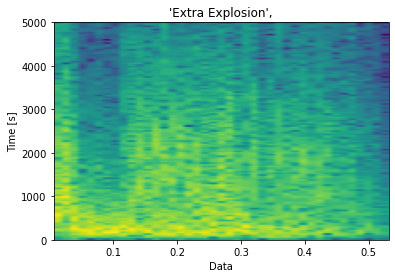

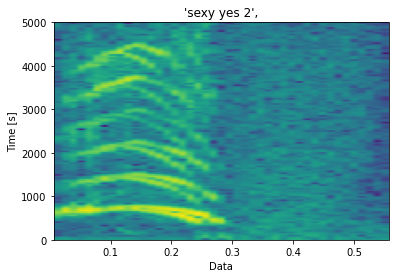

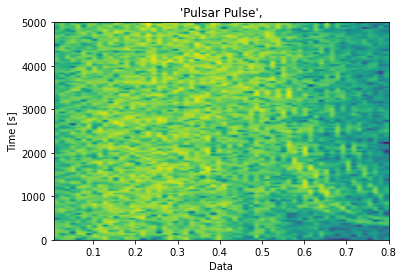

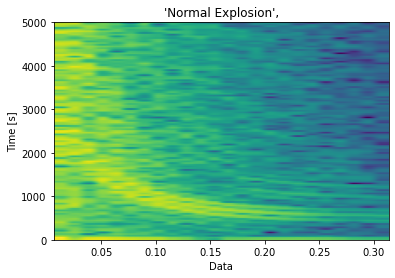

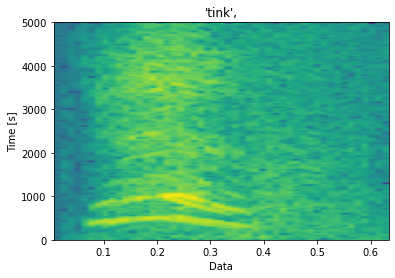

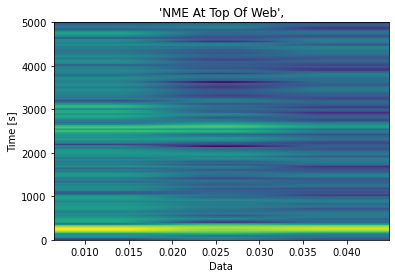

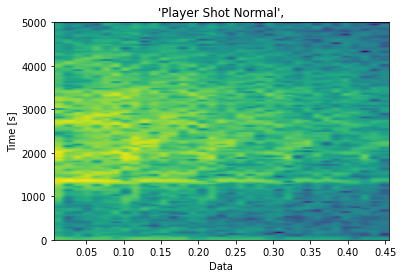

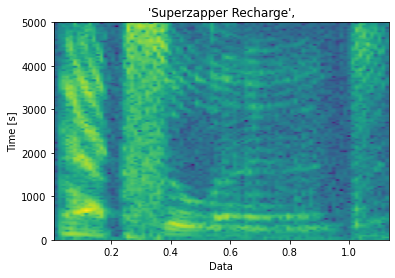

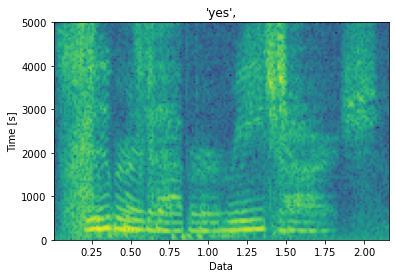

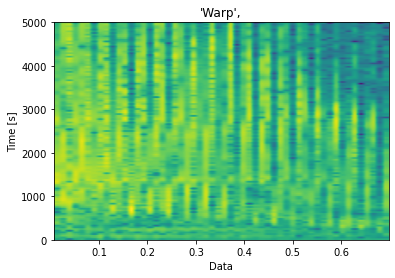

/tmp/ipykernel_1613647/856703069.py:7: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=4).
  powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud[:,0], Fs=Fs)


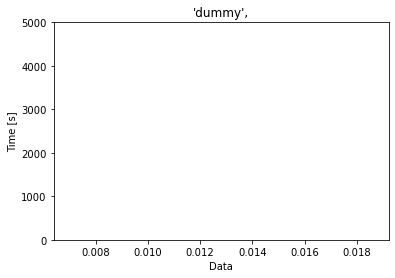

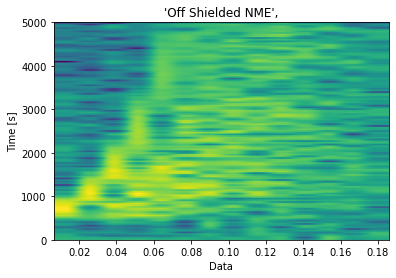

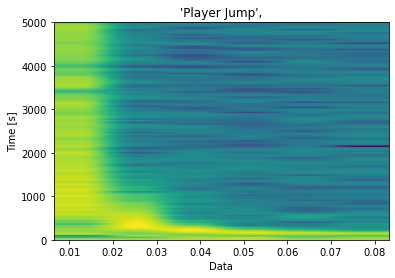

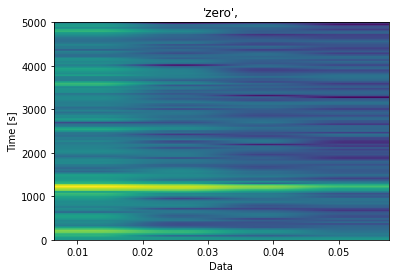

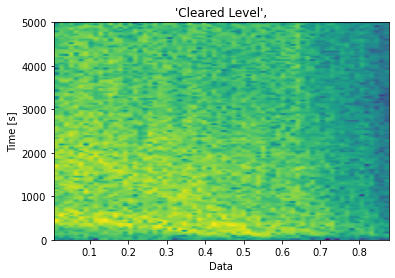

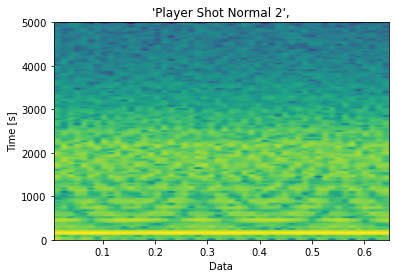

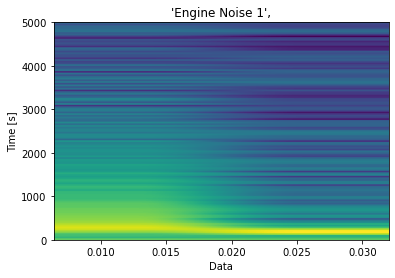

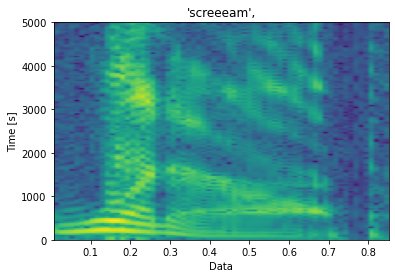

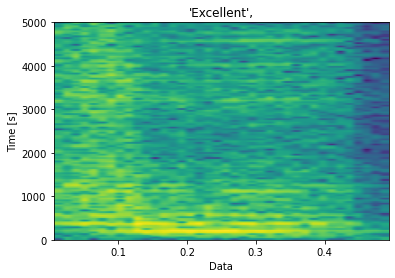

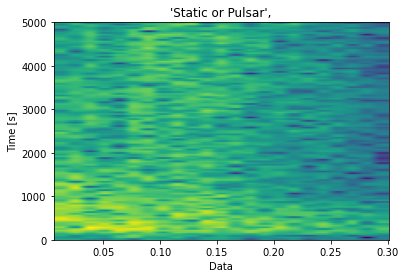

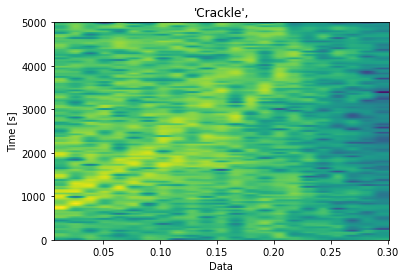

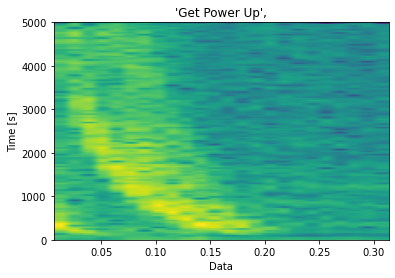

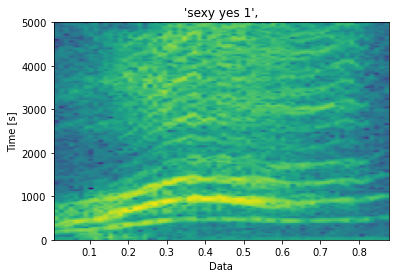

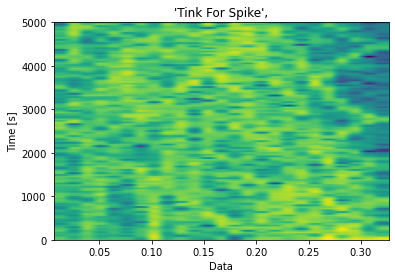

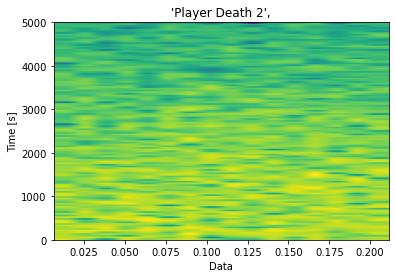

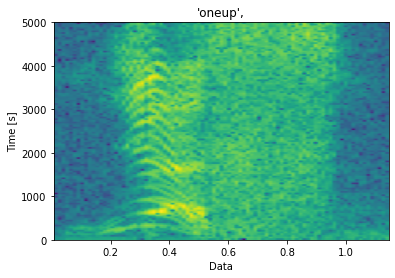

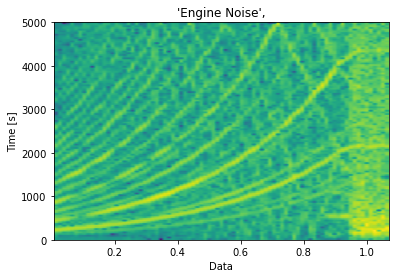

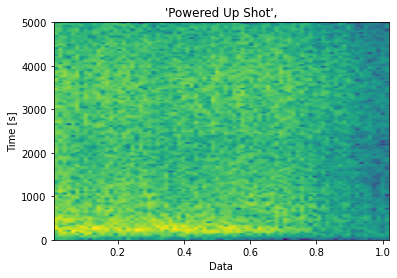

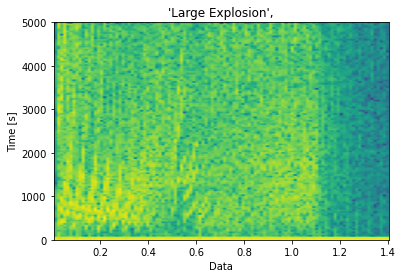

/tmp/ipykernel_1613647/856703069.py:7: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=15).
  powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud[:,0], Fs=Fs)


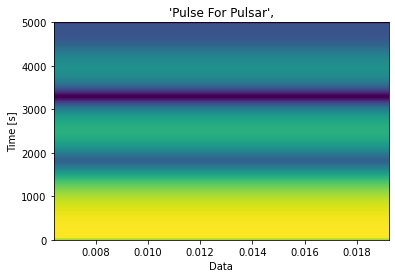

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

for wav_file in wav_files:
    Fs, aud = wavfile.read(wav_file)
    powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud[:,0], Fs=Fs)
    title = wav_info[int(wav_file.split('/')[1].split('.')[0])][0]
    plt.title(title)
    plt.xlabel("Data")
    plt.ylabel("Time [s]")
    plt.savefig(f"{wav_file}-spec.png", bbox_inches="tight")
    plt.show()
    

## Create Sine Wave plots

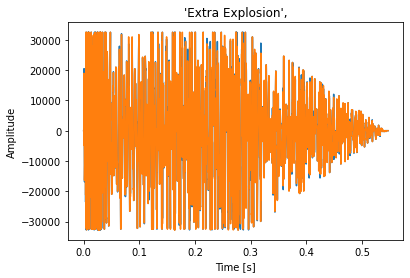

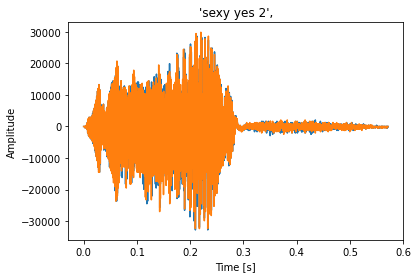

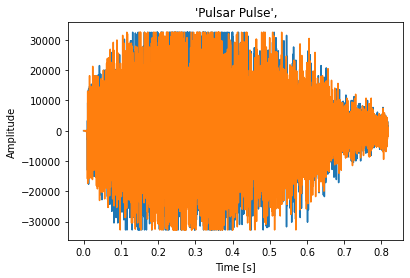

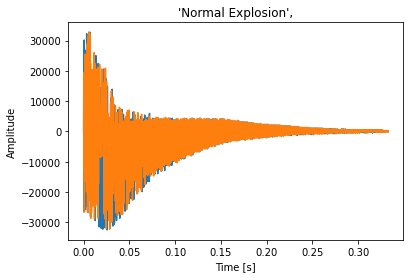

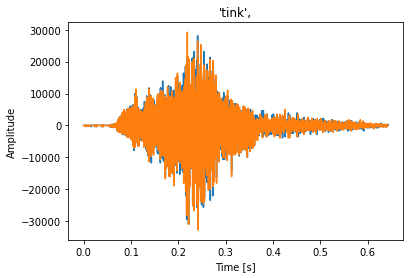

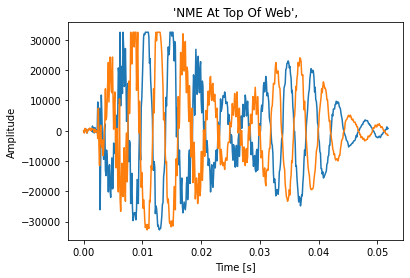

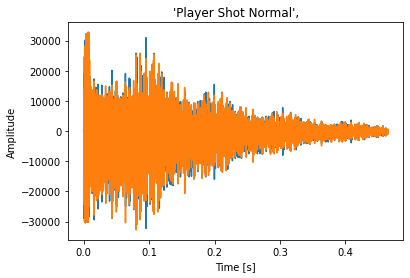

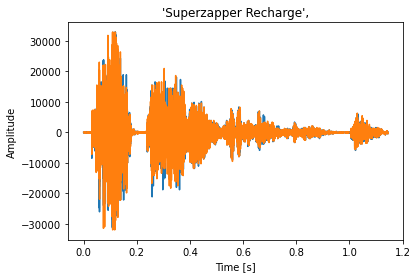

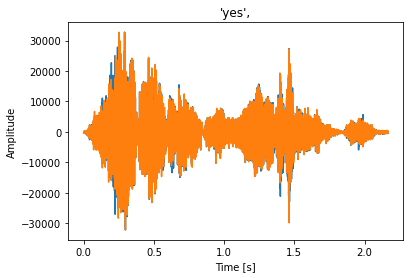

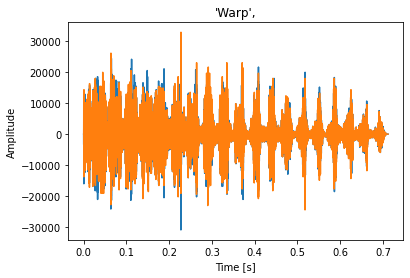

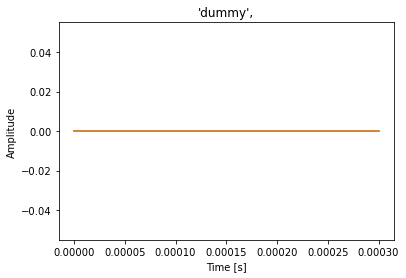

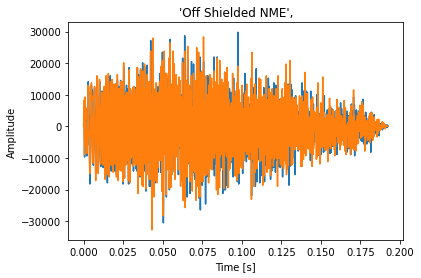

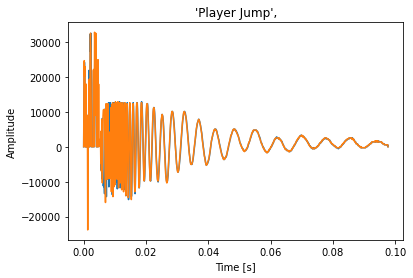

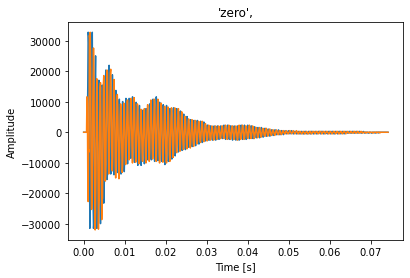

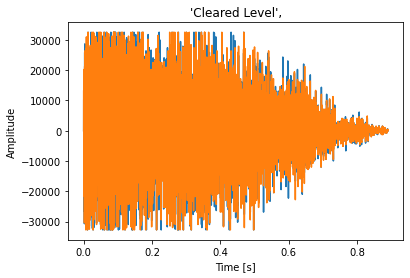

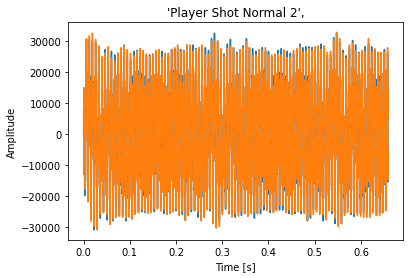

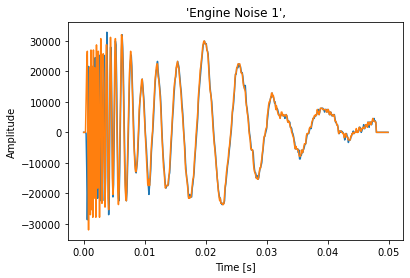

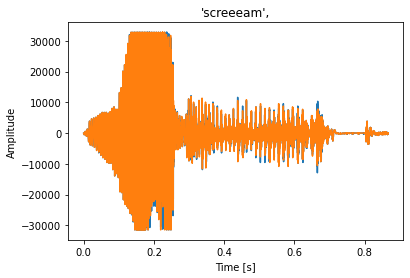

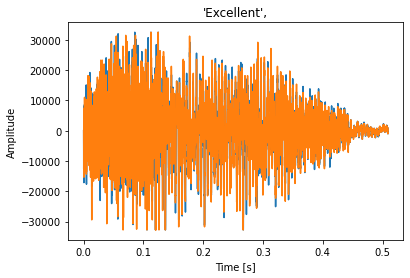

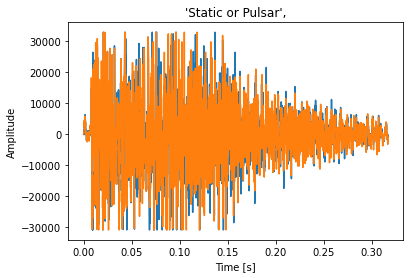

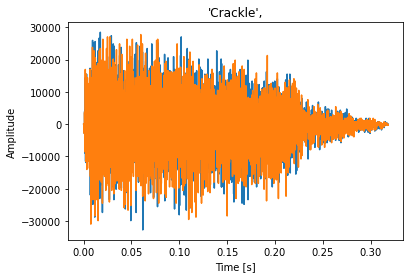

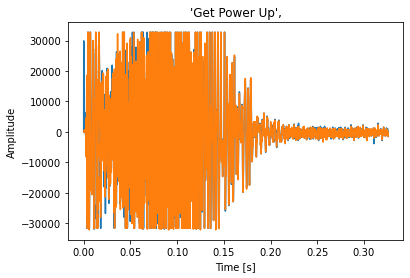

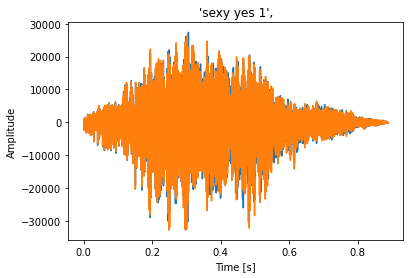

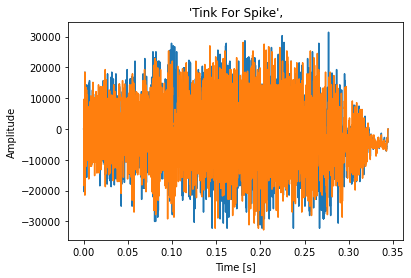

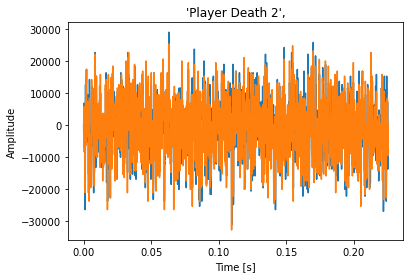

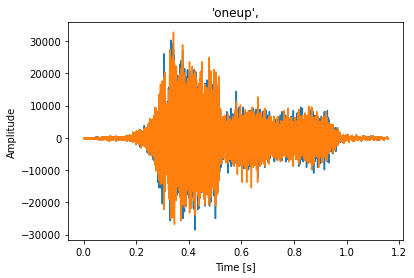

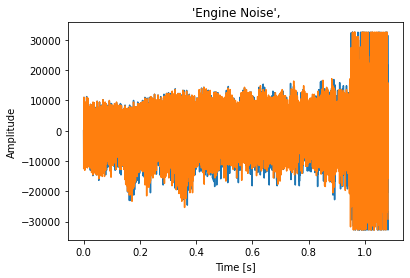

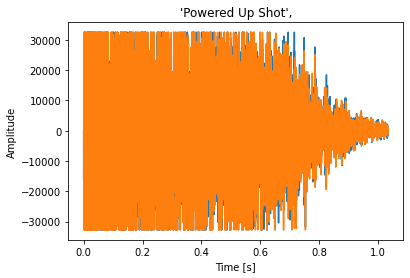

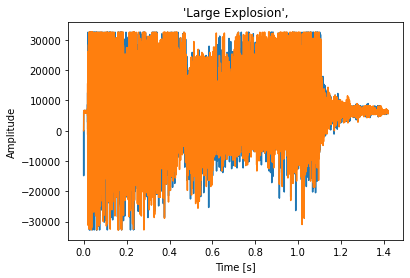

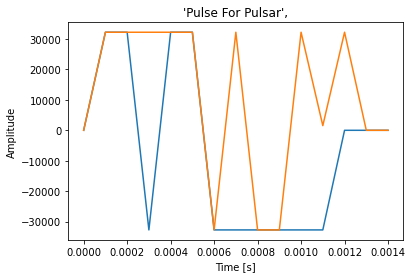

In [67]:
import os
import scipy.io
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt

for wavedata in wav_files:
    sampleRate, audioBuffer = scipy.io.wavfile.read(wavedata)
    duration = len(audioBuffer)/sampleRate
    time = np.arange(0,duration,1/sampleRate) #time vector

    plt.plot(time,audioBuffer)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    title = wav_info[int(wavedata.split('/')[1].split('.')[0])][0]
    plt.title(title)
    plt.savefig(f"{wavedata}-amp.png", bbox_inches="tight")
    plt.show()


## Scratchpad

[ 0  0  0 ...  0  0 -1]


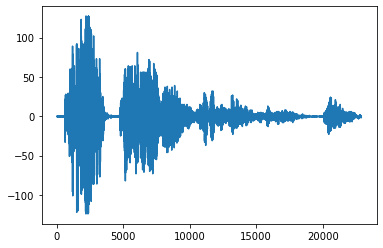

In [28]:
import numpy, pylab
data = numpy.memmap("../tempest2k/src/sounds/samples/22", dtype='b', mode='r')
print(data)
pylab.plot(data)
pylab.show()

In [80]:
SAMPLE = "../tempest2k/src/sounds/samples/22"
LC = "lc_sample"
RC = "rc_sample"
bs = open(SAMPLE,'rb').read()
lchan = [bs[i] for i in range(0,len(bs),2)]
rchan = [bs[i] for i in range(1,len(bs),2)]
print(len(lchan), len(rchan), len(bs))

open("lc_sample",'wb').write(bytes(lchan))
open("rc_sample",'wb').write(bytes(rchan))
!play -t raw -r 10k -e signed-integer -b 8 -c 1 lc_sample


11451 11451 22902
play WARN alsa: can't encode 0-bit Unknown or not applicable
play WARN alsa: can't encode 8-bit Signed Integer PCM

lc_sample:

 File Size: 11.5k     Bit Rate: 80.0k
  Encoding: Signed PCM    
  Channels: 1 @ 8-bit    
Samplerate: 10000Hz      
Replaygain: off         
  Duration: 00:00:01.15  

In:100%  00:00:01.15 [00:00:00.00] Out:11.5k [!=====|=====!]        Clip:0    
Done.


In [86]:
!diff -y -W 120 <(dd if=lc_sample|xxd) <(dd if=rc_sample|xxd)

22+1 records in
22+1 records out
22+1 records in
22+1 records out
11451 bytes (11 kB, 11 KiB) copied, 2.9944e-05 s, 382 MB/s
11451 bytes (11 kB, 11 KiB) copied, 2.8819e-05 s, 397 MB/s
00000000: 0000 0000 0000 0000 0000 0000 0000 ff00  .....   |	00000000: 0000 0000 0000 0000 0000 0000 00ff ff00  .....
00000010: 0000 00ff 0000 ff00 0000 0000 ff00 00ff  .....   |	00000010: 0000 0000 0000 00ff 0000 00ff 0000 0000  .....
00000020: 0000 0000 0000 0000 0000 0000 0000 0000  .....   |	00000020: 0000 0000 0000 0000 0000 0000 0000 ffff  .....
00000030: 00ff 00ff ff00 ffff 00ff 0000 0000 0000  .....   |	00000030: 00ff ff00 ffff 0000 0000 00ff 00ff 0000  .....
00000040: 0000 0000 0000 0000 0000 ff00 0000 0000  .....   |	00000040: 00ff 0000 0000 0000 0000 0000 0000 0000  .....
00000050: 0000 0000 00ff 0000 0000 0000 0000 0000  .....   |	00000050: 0000 0000 0000 0000 0000 0000 0000 0000  .....
00000060: 0000 0000 00ff 0000 0000 0000 0000 0000  .....   |	00000060: 0000 0000 0000 0000 0000 0000 0000 00

[ 0  0  0 ... -1  0  0]


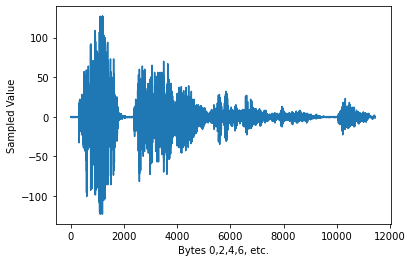

In [83]:
import numpy, pylab
data = numpy.memmap(LC, dtype='b', mode='r')
print(data)
pylab.plot(data)
plt.xlabel('Bytes 0,2,4,6, etc.')
plt.ylabel('Sampled Value')

pylab.show()

[ 0  0  0 ... -1  0 -1]


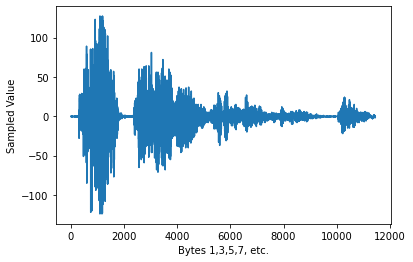

In [87]:
import numpy, pylab
data = numpy.memmap(RC, dtype='b', mode='r')
print(data)
pylab.plot(data)
plt.xlabel('Bytes 1,3,5,7, etc.')
plt.ylabel('Sampled Value')

pylab.show()

/tmp/ipykernel_1103167/591640416.py:14: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x,y, 'r', )


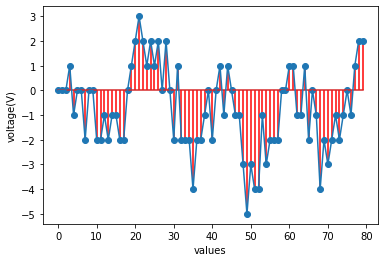

In [81]:
import matplotlib.pyplot as plt
import numpy as np
def signed(x): return (((x >> 7) * 128) ^ x) - ((x >> 7) * 128)
    
SAMPLE = "../tempest2k/src/sounds/samples/22"
bs = open(SAMPLE,'rb').read()
lchan = [signed(bs[i]) for i in range(0,len(bs),2)]
rchan = [signed(bs[i]) for i in range(1,len(bs),2)]

chan = lchan[7800:7880]
Fs = len(chan)
x = np.arange(Fs)
y = chan
plt.stem(x,y, 'r', )
plt.plot(x, y)
plt.xlabel('values')
plt.ylabel('voltage(V)')
plt.show()
#enter image description here